## Softmax

In [1]:
import numpy as np

In [2]:
vector = np.array([11231, 999, 123142])

In [3]:
vector = np.array([-10, 10, 24])

In [4]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [5]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])


# Assignment-04 基于维基百科的词向量构建

#### 在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。



### Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

### Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

### Step-03: Using gensim get word vectors:

Reference:

    https://radimrehurek.com/gensim/models/word2vec.html
    https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

### Step-04: Using some words to test your preformance.

第四步，测试同义词，找几个单词。

### Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。


In [1]:
from gensim.corpora import WikiCorpus
import jieba
from opencc import OpenCC    #pip install opencc-python-reimplemented https://pypi.org/project/opencc-python-reimplemented/
import os


def cut_extraction():
    space = ' '
    i = 0
    l = []
    cc = OpenCC('t2s')
    #path on personal PC
    #os.chdir(r'C:\Users\yuan-he\Desktop\【袁禾-人工智能与自然语言处理】培训课程编程能力测试及课程协议\第四课')
    #zhwiki_name = 'zhwiki-20190720-pages-articles-multistream.xml.bz2'
    #f = open('reduce_zhiwiki.txt', 'w',encoding='utf-8')
    
    #path on ali cloud
    zhwiki_name = './data/zhwiki-20190720-pages-articles-multistream.xml.bz2'
    f = open('./data/reduce_zhiwiki.txt', 'w',encoding='utf-8')
    
    
    wiki = WikiCorpus(zhwiki_name, lemmatize=False, dictionary={}) #从xml文件中读出训练语料
    for text in wiki.get_texts():
        n+=1
        for temp_sentence in text:
            temp_sentence = cc.convert(temp_sentence) #繁体中文转为简体中文
            seg_list = list(jieba.cut(temp_sentence)) #分词
            for temp_term in seg_list:
                l.append(temp_term)
        f.write(space.join(l) + '\n')
        l = []
        i = i + 1
        
        if (i %200 == 0):
            print('Saved ' + str(i) + ' articles')
    f.close()

C:\Users\yuan-he\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### step 2 抽取维基百科的内容
##### call cut_extraction to get  file "reduce_zhiwiki.txt" 

### Step-03: Using gensim get word vectors:

In [2]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import logging
import os
 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


def train_model():
    os.chdir(r'C:\Users\yuan-he\Desktop\【袁禾-人工智能与自然语言处理】培训课程编程能力测试及课程协议\第四课\Assignment 4\yuanhe')
    wiki_news = open(r'reduce_zhiwiki.txt', 'r',encoding='utf-8')
    
    #wiki_news = open(r'reduce_zhiwiki.txt', 'r',encoding='utf-8')
    model = Word2Vec(LineSentence(wiki_news), sg=0,size=200, window=5, min_count=5, workers=6)
    model.save(r'zhiwiki_news.word2vec')

run train_model to get three files: <br>
zhiwiki_news.word2vec <br>
zhiwiki_news.word2vec.trainables.syn1neg.npy <br>
zhiwiki_news.word2vec.wv.vectors.npy <br>

### Step-04: Using some words to test your preformance.

In [5]:
os.chdir(r'C:\Users\yuan-he\Desktop\【袁禾-人工智能与自然语言处理】培训课程编程能力测试及课程协议\第四课\Assignment 4\yuanhe')
model = Word2Vec.load('zhiwiki_news.word2vec')

2019-08-03 13:30:14,619 : INFO : loading Word2Vec object from zhiwiki_news.word2vec
2019-08-03 13:30:18,490 : INFO : loading wv recursively from zhiwiki_news.word2vec.wv.* with mmap=None
2019-08-03 13:30:18,492 : INFO : loading vectors from zhiwiki_news.word2vec.wv.vectors.npy with mmap=None
2019-08-03 13:30:29,156 : INFO : setting ignored attribute vectors_norm to None
2019-08-03 13:30:29,158 : INFO : loading vocabulary recursively from zhiwiki_news.word2vec.vocabulary.* with mmap=None
2019-08-03 13:30:29,159 : INFO : loading trainables recursively from zhiwiki_news.word2vec.trainables.* with mmap=None
2019-08-03 13:30:29,160 : INFO : loading syn1neg from zhiwiki_news.word2vec.trainables.syn1neg.npy with mmap=None
2019-08-03 13:30:48,704 : INFO : setting ignored attribute cum_table to None
2019-08-03 13:30:56,583 : INFO : loaded zhiwiki_news.word2vec


In [7]:
import pandas as pd
pd.Series(model.wv.most_similar(u'特朗普'))

2019-08-03 13:34:04,016 : INFO : precomputing L2-norms of word weight vectors


0      (川普, 0.793879508972168)
1     (布什, 0.7123298048973083)
2    (奥巴马, 0.7097333669662476)
3    (尼克松, 0.7020641565322876)
4      (克林顿, 0.69765305519104)
5    (小布什, 0.6590760350227356)
6    (杜鲁门, 0.6431760191917419)
7     (普京, 0.6397233605384827)
8    (柯林顿, 0.6389954090118408)
9     (雷根, 0.6304954290390015)
dtype: object

In [8]:
model.wv['中国']

array([ 1.0600108 ,  0.31326297, -0.25411305,  0.3745109 ,  0.6484669 ,
        0.45311597,  1.4617014 , -1.7657353 , -0.7191153 , -3.7914665 ,
       -0.24682933, -2.1854014 ,  0.9942739 ,  1.0790976 ,  0.7529428 ,
        1.3900529 ,  0.18043303, -0.4909894 , -0.13937443,  1.0169407 ,
        0.23717086, -2.7010102 ,  1.3098342 , -1.0759717 , -1.1992382 ,
       -0.40236697, -1.173348  , -1.2114786 , -0.04786243, -4.4911327 ,
       -1.1540194 , -0.653674  ,  0.19124556,  0.4855204 , -0.8547215 ,
       -2.0715325 , -3.5323987 , -0.17699933,  2.6018085 ,  0.57326114,
       -3.4208252 , -0.47842953,  2.9184947 , -0.69779056, -0.44750947,
        1.3480194 ,  0.99013984,  1.104957  , -1.2480246 , -1.5940319 ,
       -0.85615045, -0.8249402 ,  1.5367814 , -1.5272769 , -0.85933554,
        1.5613158 , -1.205895  ,  0.65853846, -2.5018632 , -0.5814789 ,
       -0.3925925 ,  0.98324716, -1.1549065 , -0.17917942, -1.9119717 ,
       -0.94081163,  1.0569692 ,  0.70537037,  1.2427136 , -2.44

In [12]:
model.wv.similarity('喜欢','热爱')

0.6065884243398592

In [13]:
model.wv.similarity('喜欢','仇恨')

0.25768057699106695

### Step-05: Using visualization tools

In [14]:
def tsne_plot(model):
    labels = []
    tokens = []
    
    words = ['口香糖','垃圾','孙悟空']   #选取几个词来画图
    for word in words:
        labels.append(word)
        tokens.append(model[word])
        for sim, _ in model.wv.most_similar(word, topn=50):
            labels.append(sim)
            tokens.append(model[sim])
        
    tsne = TSNE(perplexity=40, init='pca', n_iter=3500, random_state=42)
    new_vectors = tsne.fit_transform(tokens)
    
    x, y = [], []
    for v1, v2 in new_vectors:
        x.append(v1)
        y.append(v2)
        
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(3, 2), textcoords='offset points', ha='center', va='bottom')
        
    plt.show()

In [15]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import logging
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\yuan-he\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\yuan-he\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


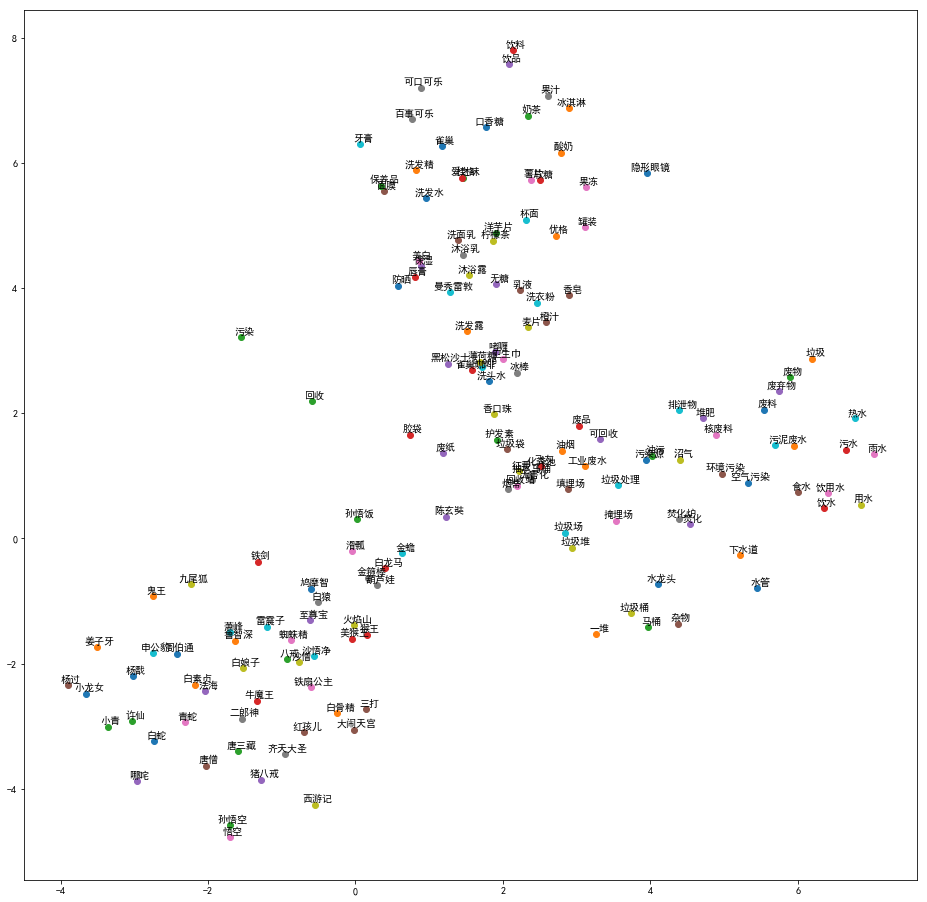

In [16]:
tsne_plot(model)